# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
heart_data = pd.read_csv('https://raw.githubusercontent.com/FachryYusrie/Proyek-Machine-Learning-Heart-Disease-Analysis/refs/heads/main/Data/heart_disease_final.csv')

In [3]:
heart_data

,id,thalch,oldpeak,ca,Cholesterol_Group,Age_Group,trestbps_Group,thalch_Group,sex_Male,dataset_Hungary,...,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,Oldpeak_Category_Depresi ST Ringan,Oldpeak_Category_Depresi ST Sedang,Oldpeak_Category_Peningkatan ST Parah,Oldpeak_Category_Peningkatan ST Ringan,Oldpeak_Category_Peningkatan ST Sedang,Cluster
0,0.0,150.0,2.30,0.0,1,2,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,1.0,108.0,1.50,3.0,2,3,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
2,2.0,129.0,2.60,2.0,1,3,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,3.0,187.0,3.50,0.0,2,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,4.0,172.0,1.40,0.0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008.0,149.0,0.50,0.0,2,2,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
1009,1009.0,151.0,0.40,0.0,2,3,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
1010,1010.0,145.0,3.75,3.0,0,2,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1011,1011.0,146.0,1.80,3.0,1,2,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# drop kolom "id" karena tidak diperlukan pada proses klasifikasi
heart_data = heart_data.drop(columns=['id'])

# Pisahkan fitur (X) dan target (y)
X = heart_data.drop(columns=['Cluster'])
y = heart_data['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Data Train shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Data Test shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(810, 32), y_train=(810,)
Test set shape: X_test=(203, 32), y_test=(203,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Melatih beberapa algoritma klasifikasi secara terpisah untuk melihat yang terbaik
# Latih algoritma K-Nearest Neighbors
knn = KNeighborsClassifier().fit(X_train, y_train)

# Latih algoritma Decision Tree
dt = DecisionTreeClassifier().fit(X_train, y_train)

# Latih algoritma RandomFOrestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)

# Latih algoritma Support Vector Machine
svm = SVC().fit(X_train, y_train)

# Latih algoritma Naive Bayes
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Untuk mendapatkan F1-Score dari algoritma yang terbaik untuk dataset, maka dicoba beberapa model klasifikasi seperti K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machine (SVM), dan Naive Bayes. Dilatih dengan data latih yang ada untuk melihat model klasifikasi terbaik yang dapat digunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

==== KNN Classifier ====
Confusion Matrix:
[[88 14]
 [34 67]]
True Positive (TP): 67
False Positive (FP): 14
False Negative (FN): 34
True Negative (TN): 88
Accuracy: 0.7635
Precision: 0.8272
Recall: 0.6634
F1-Score: 0.7363

----------------------------------------



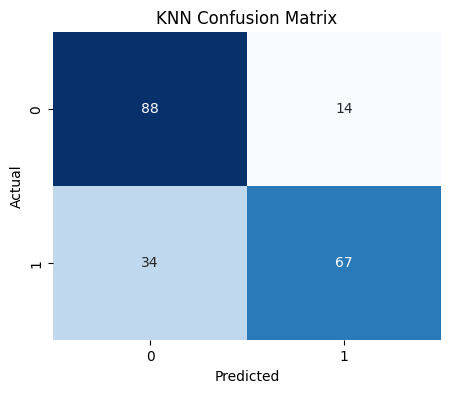

In [6]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Decision Tree Classifier ====
Confusion Matrix:
[[94  8]
 [ 9 92]]
True Positive (TP): 92
False Positive (FP): 8
False Negative (FN): 9
True Negative (TN): 94
Accuracy: 0.9163
Precision: 0.9200
Recall: 0.9109
F1-Score: 0.9154

----------------------------------------



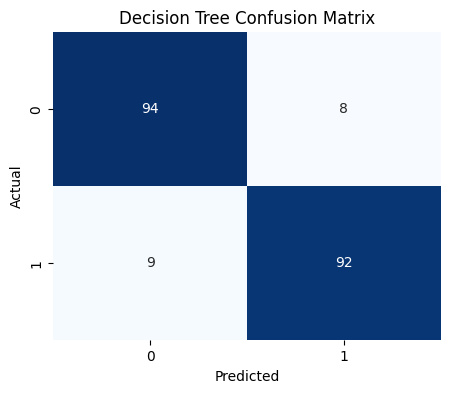

In [7]:
# Decision Tree
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Confusion Matrix:
[[100   2]
 [  8  93]]
True Positive (TP): 93
False Positive (FP): 2
False Negative (FN): 8
True Negative (TN): 100
Accuracy: 0.9507
Precision: 0.9789
Recall: 0.9208
F1-Score: 0.9490

----------------------------------------



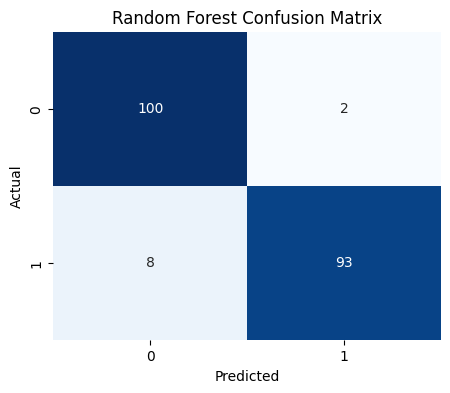

In [8]:
# Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== SVM Classifier ====
Confusion Matrix:
[[87 15]
 [39 62]]
True Positive (TP): 62
False Positive (FP): 15
False Negative (FN): 39
True Negative (TN): 87
Accuracy: 0.7340
Precision: 0.8052
Recall: 0.6139
F1-Score: 0.6966

----------------------------------------



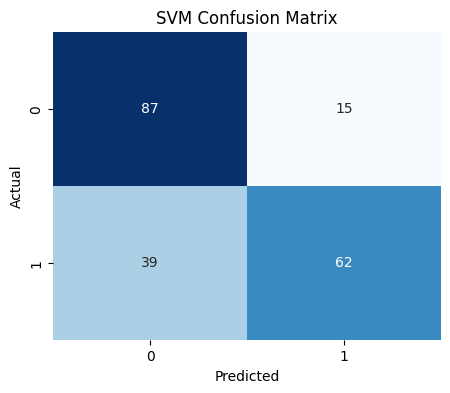

In [9]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

==== Naive Bayes Classifier ====
Confusion Matrix:
[[101   1]
 [ 19  82]]
True Positive (TP): 82
False Positive (FP): 1
False Negative (FN): 19
True Negative (TN): 101
Accuracy: 0.9015
Precision: 0.9880
Recall: 0.8119
F1-Score: 0.8913

----------------------------------------



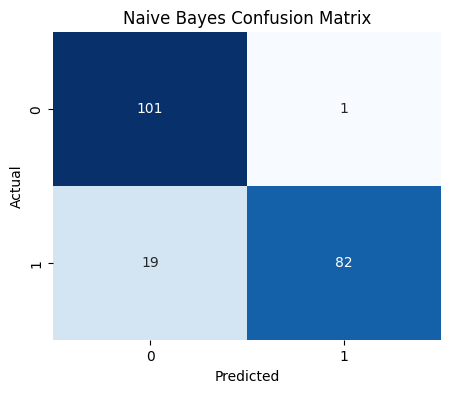

In [10]:
# Naive Bayes
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
tn, fp, fn, tp = cm_nb.ravel()
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil dalam bentuk "dictionary"
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Evaluasi setiap model dan hasil yang diperoleh
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Membuat sebuah tabel untuk merangkum hasil evaluasi setiap model
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Mengisi tabel dengan hasil evaluasi setiap model
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Mengoversi "dictionary" dalam bentuk tabel
summary_df = pd.DataFrame(rows)

# Menampilkan hasil tabel yang telah dibuat
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.763547   0.827160  0.663366  0.736264
1            Decision Tree (DT)  0.916256   0.920000  0.910891  0.915423
2            Random Forest (RF)  0.950739   0.978947  0.920792  0.948980
3  Support Vector Machine (SVM)  0.733990   0.805195  0.613861  0.696629
4              Naive Bayes (NB)  0.901478   0.987952  0.811881  0.891304


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Analisis hasil evaluasi dari beberapa model klasifikasi yang digunakan:

    a. **K-Nearest Neighbors (KNN)**
      - **Accuracy**: 76.35%
      - **Precision**: 82.72%
      - **Recall**: 66.34%
      - **F1-Score**: 73.63%

        **Analisis**: KNN memiliki akurasi yang cukup baik (76.35%). Precision-nya (82.72%) menunjukkan bahwa model cukup baik dalam mengidentifikasi kasus positif yang sebenarnya. Namun, recall-nya (66.34%) menunjukkan bahwa model ini kurang efektif dalam menangkap semua kasus positif yang ada. F1-Score 73.63% mencerminkan trade-off antara precision dan recall.

  b. **Decision Tree (DT)**
      - **Accuracy**: 91.63%
      - **Precision**: 92.00%
      - **Recall**: 91.09%
      - **F1-Score**: 91.54%

        **Analisis**: Decision Tree memiliki akurasi yang lebih tinggi (91.63%) dibandingkan KNN. Precision-nya (92.00%) lebih tinggi daripada beberapa model lain kecuali model Random Forest. Recall-nya (91.09%) sangat baik, menunjukkan bahwa model ini efektif dalam menangkap kasus positif. F1-Score 91.54% menunjukkan performa yang seimbang antara precision dan recall.

  c. **Random Forest (RF)**
      - **Accuracy**: 95.07%
      - **Precision**: 97.89%
      - **Recall**: 92.08%
      - **F1-Score**: 94.50%

        **Analisis**: Random Forest menunjukkan performa terbaik di antara semua model dengan akurasi tertinggi (95.07%). Precision-nya (97.89%) juga sangat baik, menunjukkan bahwa model ini sangat akurat dalam memprediksi kasus positif. Recall-nya (92.08%) sangat baik dalam menangkap kasus positif. F1-Score 94.50% menunjukkan trade-off yang baik antara precision dan recall.

   d. **Support Vector Machine (SVM)**
      - **Accuracy**: 73.40%
      - **Precision**: 80.52%
      - **Recall**: 61.39%
      - **F1-Score**: 69.66%

        **Analisis**: SVM memiliki akurasi yang tinggi (73.40%) dan precision yang sangat baik (80.52%). Namun, recall-nya yang rendah (61.39%) menunjukkan bahwa model ini cenderung melewatkan banyak kasus positif. F1-Score 69.66% mencerminkan trade-off antara precision yang tinggi dan recall yang rendah.

  e. **Naive Bayes (NB)**
      - **Accuracy**: 90.15%
      - **Precision**: 98.80%
      - **Recall**: 81.20%
      - **F1-Score**: 89.13%

        **Analisis** : Naive Bayes memiliki akurasi yang kompetitif (90.15%) dan precision yang sangat baik (98.80%). Recall-nya yang tinggi (81.20%) menunjukkan bahwa model ini cukup efektif dalam menangkap kasus positif. F1-Score 89.13% menunjukkan bahwa model ini mencerminkan trade-off cukup baik antara precision dan recall.

  **Kesimpulan:**
    **Random Forest** adalah model dengan **akurasi tertinggi** (95.07%) dan **precision yang sangat baik** (97.89%) hanya sedikit dibawah model Naive Bayes dengan Precision (98.80%). Kemudian recall-nya tertinggi dibandingkan model lain (92.08%) serta F1-Score-nya yang tertinggi (94.50%) menunjukkan keseimbangan yang baik antara precision dan recall. Ini menjadikannya pilihan yang sangat baik pada pengklasifikasian data "heart_deases" yang telah di beri label pada proses klastering sebelumnya.
2. Kelemahan dari Random Forest
   - kebutuhan memori yang tinggi
   - prediksi yang membutuhkan waktu yang lebih lama dibandingkan dengan model lain.
3. Rekomendasi:
   - Dari model terbaik yang didapatkan, bisa dilakukan hyperparameter tunning agar bisa mendapatkan F1-Score yang lebih baik meskipun dengan F1-Score saat ini sudah sangat baik.
   - Kemudian dengan mengumpulkan data pasien dari berbagai rumah sakit yang ada dapat meningkatkan acuracy dari pengklasifikasian pasien sakit jantung.
   - Jika dataset yang dikumpulkan sudah sangat besar, maka bisa mencoba memanfaatkan model yang lain seperti neural network.